- Notebook Author: [Trenton McKinney][1]
- Course: **[DataCamp: Introduction to Network Analysis in Python][2]**
 - This [notebook][3] was created as a reproducible reference.
 - The material is from the course
 - I completed the exercises
 - If you find the content beneficial, consider a [DataCamp Subscription][4].
 - I added a function (**`create_dir_save_file`**) to automatically download and save the required data (`data/2020-05-21_intro_to_network_analysis_in_python`) and image (`Images/2020-05-21_intro_to_network_analysis_in_python`) files.

  [1]: https://trenton3983.github.io/
  [2]: https://learn.datacamp.com/courses/introduction-to-network-analysis-in-python
  [3]: https://github.com/trenton3983/DataCamp/blob/master/2020-05-21_intro_to_network_analysis_in_python.ipynb
  [4]: https://www.datacamp.com/join-me/MjQwNzMyMg==

#### Course Description

From on-line social networks such as Facebook and Twitter to transportation networks such as bike sharing systems, networks are everywhere. And knowing how to analyze them will open up a new world of possibilities for you as a data scientist. This course will equip you with the skills to analyze, visualize, and make sense of networks. You'll apply the concepts you learn to real-world network data using the powerful `NetworkX` library. With the knowledge gained in this course, you'll develop your network thinking skills and be able to look at your data with a fresh perspective.

#### Imports

In [2]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict

import pickle

/Users/Harry/opt/miniconda3/envs/arm30/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [3]:
print(f'NetworkX version: {nx.__version__}')
# print(f'NXViz version: {nv.__version__}')
print(f'Matplotlib version: {mpl.__version__}')

NetworkX version: 2.8.4
Matplotlib version: 3.5.3


#### Functions

In [4]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')
        
    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')

In [5]:
data_dir = Path('network example')
images_dir = Path('network example/image')

#### Datasets

In [6]:
twitter = 'https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p'
github = 'https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p'

In [7]:
datasets = [twitter, github]
data_paths = list()

for data in datasets:
    file_name = data.split('/')[-1].replace('?raw=true', '')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, data)
    data_paths.append(data_path)

Directory Exists
File Exists
Directory Exists
File Exists


#### Data

In [8]:
T = nx.read_gpickle(data_paths[0])
Gh = nx.read_gpickle(data_paths[1])

# Introduction to networks

In this chapter, you'll be introduced to fundamental concepts in network analytics while exploring a real-world Twitter network dataset. You'll also learn about [NetworkX][1], a library that allows you to manipulate, analyze, and model graph data. You'll learn about the different types of graphs and how to rationally visualize them.

  [1]: https://networkx.github.io/documentation/stable/index.html

## Networks

### Examples of Networks
1. Social
 - In a social network, we're modeling the relationship between people.
1. Transportation
 - In a transportation network, we're modeling the connectivity between locations, as determined by the roads or flight paths connection them.
- Networks are a useful tool for modeling relationships between entities.

### Insights
1. Important entities: influencers in social networks
1. Pathfinding: most efficient transportation path
1. Clustering: finding communities
- By modeling the data as a network, you can gain insight into what entities (or nodes) are important, such as broadcasters or influencers in a social network.
- You can start to think about optimizing transportation between cities.
- Leverage the network structure to find communities in the network.

### Network Structure

![network_structure][1]

- Networks are described by two sets of items, which form a "network".
 - Nodes
 - Edges
- In mathematical terms, this is a graph.
- Nodes and edges can have metadata associated with them.
 - Lets say there are two friends, Hugo and myself, who met on May 21, 2016.
 - The nodes may be "Hugo" and myself, with metadata stored in a `key-value` pair as `id` and `age`.
 - The friendship is represented as a line between two nodes, and may have metadata such as `date`, which represents the date we first met.
 
![social graph][2]

### NetworkX

- This python library allows us to manipulate, analyze, and model, graph data.
- Using `nx.Graph()`, we initialize an empty graph, to which we can add nodes and edges
- The integers 1, 2, and 3 can be entered as nodes, using the `add_nodes_from` method, passing in the list `[1, 2, 3]`, as an argument.
- Use the `.nodes` method to see the nodes present in the graph.
- Similarly, use `.add_edges` and `.edges` to add and see the edges present in the graph.
- Edges between nodes are represented as a tuple, in which each tuple shows the nodes that are present on that edge.

```python
import networkx as nx

G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.nodes()
>>> [1, 2, 3]
G.add_edge(1, 2)
G.edges()
>>> [(1, 2)]
```

- Metadata can be stored on the graph as well.
- For example, I can add to the node `1`, a `label` key with the value `blue`, just as I would assign a value to the key of a dictionary.
- The node list can be retrieved with `G.nodes()` and passing the `data=True` parameter.
 - This returns a list of tuples, in which the first element of each tuple is the node, and the second element is a dictionary, in which the `key-value` pairs correspond to the metadata.

```python
G.node[1]['label'] = 'blue'
G.nodes(data=True)
>>>[(1, {'label': 'blue}), (2, {}), (3, {})]
```

- `networkx` as provides basic drawing functionality, using the `nx.draw()` function, which takes in a graph `G` as an argument.
- In the IPyhton shell, you'll also have to call `plt.show()` function in order to display the graph screen.
- With this graph, the `nx.draw()` function will draw to screen what we call a **node-link diagram** rendering of the graph.

```python
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()
```

- The first set of exercises we'll be doing is essentially exploratory data analysis on graphs.

### Other Resources
1. [Wikipedia: Network Theory][3]


  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/network_structure_1.JPG
  [2]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/network_structure_2.JPG
  [3]: https://en.wikipedia.org/wiki/Network_theory

### What is a network?

Let's think again about examples of networks. Which of the following data is least easily modeled as a network?

- ~~Airplane transportation.~~
- **Phone numbers in a telephone directory.**
- ~~Co-authorship of papers.~~
- ~~Atoms in a molecule.~~

1. Compared to the other options, it would not be as easy to model phone numbers in a telephone directory as a network.

### Basics of NetworkX API, using Twitter network

To get you up and running with the NetworkX API, we will run through some basic functions that let you query a Twitter network that has been pre-loaded for you and is available in the IPython Shell as `T`. The Twitter network comes from [KONECT][1], and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the NetworkX API to explore some basic properties of the network, and are encouraged to experiment with the data in the IPython Shell.

Wait for the IPython shell to indicate that the graph that has been preloaded under the variable name T (representing a Twitter network), and then answer the following question:

What is the size of the graph `T`, the type of `T.nodes()`, and the data structure of the third element of the last edge listed in `T.edges(data=True)`? The `len()` and `type()` functions will be useful here. To access the last entry of `T.edges(data=True)`, you can use `list(T.edges(data=True))[-1]`.

- **23369, `networkx.classes.reportviews.NodeView`, `dict`.**
- ~~32369, `tuple`, `datetime`.~~
- ~~23369, `networkx.classes.reportviews.NodeView`, `datetime`.~~
- ~~22339, `dict`, `dict`.~~


  [1]: http://konect.uni-koblenz.de/

In [11]:
print(len(T))
print(type(T.nodes()))
print(list(T.edges(data=True))[-1])
print(type(list(T.edges(data=True))[-1][2]))

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
<class 'dict'>


### Basic drawing of a network using NetworkX

NetworkX provides some basic drawing functionality that works for small graphs. We have selected a subset of nodes from the graph for you to practice using NetworkX's drawing facilities. It has been pre-loaded as `T_sub`.

**Instructions**

- Import `matplotlib.pyplot` as `plt` and `networkx` as `nx`.
- Draw `T_sub` to the screen by using the `nx.draw()` function, and don't forget to also use `plt.show()` to display it.

#### Creating `T_sub`
- Use [DiGraph][1] instead of [Graph][2]
- [Why don't edges added with G.add_edges_from(), match G.edges()?][3]


  [1]: https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html#networkx.DiGraph
  [2]: https://networkx.github.io/documentation/networkx-1.10/reference/classes.graph.html#networkx.Graph
  [3]: https://stackoverflow.com/questions/62032404/why-dont-edges-added-with-g-add-edges-from-match-g-edges

In [22]:
T_sub = nx.DiGraph()
edges_from_T = [x for x in T.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if x[1] < 50]
T_sub.add_edges_from(edges_from_T)

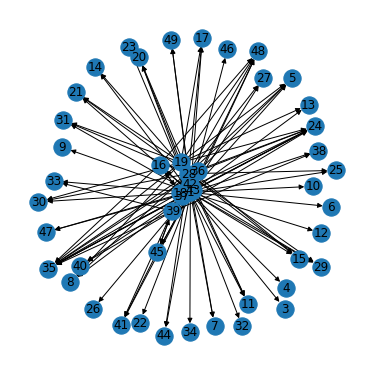

In [24]:
plt.figure(figsize=(5, 5))
nx.draw(T_sub, with_labels=True)
plt.show()

### Queries on a graph

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the `.nodes()` and `.edges()` methods that Eric went over in the video. The `.nodes()` method returns a list of nodes, while the `.edges()` method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to [Part 2][1] of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

`[` *output expression* `for` *iterator variable* `in` *iterable* `if` *predicate expression* `]`.

You have to fill in the `_iterable_` and the `_predicate expression_`. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

**Instructions**

- Use a list comprehension to get a **list of nodes** from the graph `T` that have the `'occupation'` label of `'scientist'`.
 - The _output expression_ `n` has been specified for you, along with the _iterator variables_ `n` and `d`. Your task is to fill in the _iterable_ and the _conditional expression_.
 - Use the `.nodes()` method of `T` access its nodes, and be sure to specify `data=True` to obtain the metadata for the nodes.
 - The iterator variable `d` is a dictionary. The key of interest here is `'occupation'` and value of interest is `'scientist'`.
- Use a list comprehension to get a **list of edges** from the graph T that were formed for at least 6 years, i.e., from before **1 Jan 2010**.
 - Your task once again is to fill in the _iterable_ and _conditional expression_.
 - Use the `.edges()` method of `T` to access its edges. Be sure to obtain the metadata for the edges as well.
 - The dates are stored as `datetime.date` objects in the metadata dictionary `d`, under the key `'date'`. To access the date 1 Jan 2009, for example, the dictionary value would be `date(2009, 1, 1)`.


  [1]: https://www.datacamp.com/courses/python-data-science-toolbox-part-2

In [25]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'].year < 2010]

In [26]:
print(noi[:10])
print(eoi[:10])

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


## Types of Graphs

1. Undirected graphs
 - Facebook
 - They are comprised of edges that don't have any inherent directionality associated with them.
 - With Facebook, for example, when one user befriends another, the two are automatically connected with an edge.
 - This is commonly drawn as a line with no arrows between two circles.
 - Undirected graphs have the type `Graph`
 
```python
import networkx as nx

G = nx.Graph()
type(G)
>>> networkx.classes.graph.Graph
``` 

2. Directed graphs
 - Twitter
 - This is because of the nature of how users interact with one another.
 - For example, one user may follow another, but that other user may not follow back.
 - As such, there's an inherent directionality associated with the graph
 - Directed grasphs have the type `DiGraph`
 
```python
D = nx.DiGraph()
type(D)
>>> networkx.classes.digraph.DiGraph
```

3. Muti-edge (Directed) graphs
 - Graph in which there are multiple edges permitted between the nodes
 - For example, we may want to model trips between bike sharing stations
 - Each trip may be one edge between the pair of stations
 - Sometimes, for practical reasons, it may be too memory-intensive too model multiple edges per pair of nodes, and so one may choose to collapse the edges into a single edge that contains a metadata summary of the original.
    - For example, we may want to collapse these three edges into a single one and give them a _weight_ metadata with the value _3_, indicating that it was originally 3 edges between the pair of nodes.

![multi-edge][1]

```python
M = nx.MultiGraph
type(M)
>>> networkx.classes.multigraph.MultiGraph

MD = nx.MultiDiGraph
type(MD)
>>> networkx.classes.multidigraph.MultiDiGraph
```

4. Self-loops
 - Self-loops can be used in certain scenarios, such as in bike sharing data, where a trip begins at a station and ends at the same station.


  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/multi-edge.JPG

### Checking the un/directed status of a graph

In the video, Eric described to you different types of graphs. Which type of graph do you think the Twitter network data you have been working with corresponds to? Use Python's built-in `type()` function in the IPython Shell to find out. The network, as before, has been pre-loaded as `T`.

Of the four below choices below, which one corresponds to the type of graph that `T` is?

- ~~Undirected Graph.~~
- **Directed Graph.**
- ~~Undirected Multi-Edge Graph.~~
- ~~Directed Multi-Edge Graph.~~

### Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the `'weight'` key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of `T` and explore it, for instance by running the commands `T.edges[1, 10]` and then `T.edges[10, 1]`. Note how there's only one field, and now you're going to add another field, called `'weight'`.

**Instructions**

- Set the `'weight'` attribute of the edge between node `1` and `10` of `T` to be equal to `2`. Refer to the following template to set an attribute of an edge: `network_name.edges[node1, node2]['attribute'] = value`. Here, the `'attribute'` is `'weight'`.
- Set the weight of every edge involving node `293` to be equal to `1.1`. To do this:
 - Using a `for` loop, iterate over all the edges of `T`, including the `metadata`.
 - If `293` is involved in the list of nodes `[u, v]`:
    - Set the weight of the edge between `u` and `v` to be `1.1`.

In [ ]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

### Checking whether there are self-loops in the graph

As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops().`

In this exercise as well as later ones, you'll find the `assert` statement useful. An `assert`-ions checks whether the statement placed after it evaluates to True, otherwise it will throw an `AssertionError`.

To begin, use the `.number_of_selfloops()` method on `T` in the IPython Shell to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

**Instructions**

- Define a function called `find_selfloop_nodes()` which takes one argument: `G`.
 - Using a `for` loop, iterate over all the edges in `G` (excluding the metadata).
 - If node `u` is equal to node `v`:
   - Append `u` to the list `nodes_in_selfloops`.
   - Return the list `nodes_in_selfloops`.
- Check that the number of self loops in the graph equals the number of nodes in self loops. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
# number_of_selfloops() is deprecated
assert len(list(nx.selfloop_edges(T))) == len(find_selfloop_nodes(T))

In [ ]:
len(list(nx.selfloop_edges(T)))

**There are 42 nodes in T that have self-loops.**

## Network Visualization

1. Matrix plots
 - ![matrix_plots][1]
 - Nodes are the rows and columns of a matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.
 - In an undirected graph, the matrix is symmetrical around the diagonal, which is highlighted in gray.
 - Figure 3: edge (A, B) is equivalent to edge (B, A).  Highlighted in yellow.
 - Figure 4: edge (A, C) is equivalent to edge (C, A), because there's no directionality associated with that edge.
 - With directed graphs, the matrix representation is not necessarily going to be symmetrical.
 - Figure 5: there's a bidirectional edge between A and C, but only an edge from A to B and not B to A.
       - (A, B) will be filled in, but not (B, A)
 - If the nodes are ordered along the rows and columns, such that neighbors are listed close to one another, then a matrix plot can be used to visualized clusters, or communities, of nodes.
1. Arc plots
 - ![arc_plots][2]
 - Are a transformation of the node-link diagram layout, in which nodes are ordered along one axis of the plot, and edges are drawn using circular arcs from one node to another.
 - If the nodes are ordered according to some sortable rule, such as age in a social network of users, or otherwise grouped together, by geographic location in map for a transportation network, then it will be possible to visualized the relationship between connectivity and the sorted (or grouped) property.
  - Arc plots are a good starting point for visualizing a network, as it forms the basis of the later plots that we'll take a look at.
1. Circos plots
 - ![circo_plot][3]
 - Are a transformation of the Arc Plot, such that two ends of the Arc Plot are joined together into a circle.
 - Were originally designed for use in genomics, and you can think of them as an aesthetic and compact alternative to Arc Plots.
- You will be using [nxviz][4] to plot the graphs.

```python
import nxviz as nv
import matplotlib.pyplot as plt
ap = nv.ArcPlot(G)
ap.draw()
plt.show()
```



  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/matrix_plots.JPG
  [2]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/arc_plots.JPG
  [3]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/circo_plots.JPG
  [4]: https://github.com/ericmjl/nxviz

### Visualizing using Matrix plots

It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, `nxviz` provides a `MatrixPlot` object.

`nxviz` is a package for visualizing graphs in a rational fashion. Under the hood, the `MatrixPlo`t utilizes `nx.to_numpy_matrix(G)`, which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the `weight` metadata is preserved; all other metadata is lost, as you'll verify using an `assert` statement.

A corresponding `nx.from_numpy_matrix(A)` allows one to quickly create a graph from a NumPy matrix. The default graph type is `Graph()`; if you want to make it a `DiGraph()`, that has to be specified using the `create_using` keyword argument, e.g. (`nx.from_numpy_matrix(A, create_using=nx.DiGraph`)).

One final note, `matplotlib.pyplot` and `networkx` have already been imported as `plt` and `nx`, respectively, and the graph `T` has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

**Instructions**

- Import `nxviz` as `nv`.
- Plot the graph `T` as a matrix plot. To do this:
 - Create the `MatrixPlot` object called `m` using the `nv.MatrixPlot()` function with `T` passed in as an argument.
 - Draw the `m` to the screen using the `.draw()` method.
 - Display the plot using `plt.show()`.
- Convert the graph to a matrix format, and then convert the graph back to the NetworkX form from the matrix as a directed graph.
- Check that the `category` metadata field is lost from each node.

In [ ]:
data = [(13829, 1386, {'date': date(2012, 3, 13)}), (3086, 669, {'date': date(2009, 3, 1)}), (3086, 3100, {'date': date(2013, 8, 10)}), (3086, 3117, {'date': date(2007, 12, 20)}), (4111, 4133, {'date': date(2007, 10, 28)}), (4111, 12582, {'date': date(2013, 6, 1)}), (6163, 7331, {'date': date(2013, 2, 3)}), (6163, 7336, {'date': date(2007, 9, 12)}), (6163, 6168, {'date': date(2008, 4, 2)}), (6163, 1326, {'date': date(2009, 2, 16)}), (4636, 4666, {'date': date(2012, 3, 20)}), (543, 12123, {'date': date(2014, 8, 12)}), (36, 24, {'date': date(2009, 4, 23)}), (12836, 12856, {'date': date(2014, 2, 21)}), (10790, 10854, {'date': date(2009, 8, 11)}), (9262, 9338, {'date': date(2007, 11, 11)}), (4160, 4161, {'date': date(2012, 4, 14)}), (4160, 3681, {'date': date(2013, 8, 10)}), (7746, 3396, {'date': date(2007, 2, 23)}), (7746, 543, {'date': date(2011, 7, 14)}), (7746, 5073, {'date': date(2012, 2, 25)}), (7746, 1130, {'date': date(2013, 8, 4)}), (7746, 3265, {'date': date(2008, 11, 8)}), (19013, 21248, {'date': date(2009, 3, 21)}), (19013, 21253, {'date': date(2007, 8, 17)}), (14916, 14930, {'date': date(2012, 4, 10)}), (5717, 5752, {'date': date(2009, 2, 2)}), (3159, 3176, {'date': date(2011, 8, 15)}), (3159, 3177, {'date': date(2008, 2, 1)}), (3159, 3193, {'date': date(2014, 1, 2)}), (1627, 1648, {'date': date(2011, 11, 7)}), (19550, 19570, {'date': date(2009, 11, 13)}), (5215, 5217, {'date': date(2011, 1, 7)}), (4198, 16203, {'date': date(2014, 12, 1)}), (3177, 3159, {'date': date(2010, 6, 2)}), (3177, 3176, {'date': date(2014, 11, 10)}), (1134, 2406, {'date': date(2011, 7, 10)}), (1134, 543, {'date': date(2011, 10, 20)}), (4206, 21962, {'date': date(2014, 4, 17)}), (6770, 2671, {'date': date(2010, 5, 18)}), (11384, 4955, {'date': date(2007, 2, 12)}), (11384, 2406, {'date': date(2007, 10, 13)}), (11384, 11402, {'date': date(2009, 11, 27)}), (10877, 10917, {'date': date(2014, 7, 17)}), (10877, 7886, {'date': date(2009, 1, 4)}), (10877, 36, {'date': date(2008, 10, 25)}), (10877, 10936, {'date': date(2008, 12, 26)}), (10877, 1326, {'date': date(2012, 1, 19)}), (10373, 1386, {'date': date(2011, 4, 21)}), (10373, 2501, {'date': date(2012, 8, 13)}), (3213, 3214, {'date': date(2008, 4, 19)}), (3213, 3265, {'date': date(2007, 8, 8)}), (3213, 3266, {'date': date(2009, 1, 4)}), (5626, 16654, {'date': date(2011, 3, 5)}), (20122, 20177, {'date': date(2014, 12, 21)}), (667, 669, {'date': date(2014, 2, 3)}), (667, 747, {'date': date(2008, 2, 23)}), (161, 18159, {'date': date(2014, 9, 22)}), (7331, 6163, {'date': date(2012, 10, 15)}), (7331, 6168, {'date': date(2012, 3, 17)}), (7331, 7606, {'date': date(2008, 11, 7)}), (7331, 24, {'date': date(2009, 9, 21)}), (7331, 36, {'date': date(2010, 5, 26)}), (10917, 10877, {'date': date(2011, 9, 7)}), (10917, 24, {'date': date(2014, 10, 16)}), (10917, 7886, {'date': date(2011, 7, 13)}), (10917, 36, {'date': date(2013, 8, 8)}), (10917, 1326, {'date': date(2009, 5, 23)}), (22184, 22188, {'date': date(2012, 11, 3)}), (6318, 6301, {'date': date(2011, 4, 3)}), (8367, 8421, {'date': date(2012, 7, 10)}), (21167, 3931, {'date': date(2012, 7, 9)}), (3265, 4955, {'date': date(2012, 6, 6)}), (3265, 4811, {'date': date(2014, 9, 18)}), (3265, 3266, {'date': date(2008, 9, 24)}), (3266, 4811, {'date': date(2007, 2, 16)}), (3266, 1926, {'date': date(2008, 3, 16)}), (3266, 3265, {'date': date(2014, 5, 25)}), (4291, 4306, {'date': date(2014, 9, 9)}), (4291, 4310, {'date': date(2007, 9, 11)}), (4811, 4955, {'date': date(2007, 4, 19)}), (4811, 3265, {'date': date(2013, 8, 23)}), (4811, 3266, {'date': date(2008, 8, 25)}), (7886, 10877, {'date': date(2012, 9, 5)}), (7886, 10917, {'date': date(2008, 9, 19)}), (7886, 24, {'date': date(2014, 8, 17)}), (7886, 36, {'date': date(2012, 9, 21)}), (7886, 1326, {'date': date(2012, 3, 23)}), (6863, 14981, {'date': date(2012, 8, 7)}), (13012, 13017, {'date': date(2012, 3, 4)}), (16597, 24, {'date': date(2012, 5, 2)}), (16597, 36, {'date': date(2011, 4, 19)}), (16597, 16610, {'date': date(2011, 11, 11)}), (12507, 12523, {'date': date(2012, 3, 11)}), (16618, 16619, {'date': date(2013, 3, 3)}), (13036, 15161, {'date': date(2012, 4, 23)}), (3826, 669, {'date': date(2014, 11, 9)}), (3826, 3100, {'date': date(2009, 2, 24)}), (3826, 3860, {'date': date(2013, 7, 27)}), (3826, 3681, {'date': date(2013, 2, 14)}), (7410, 7437, {'date': date(2012, 5, 2)}), (15092, 2148, {'date': date(2014, 11, 11)}), (15092, 20816, {'date': date(2009, 4, 8)}), (2820, 2826, {'date': date(2011, 10, 1)}), (2820, 2871, {'date': date(2010, 3, 26)}), (2311, 2371, {'date': date(2008, 8, 26)}), (11020, 11042, {'date': date(2008, 5, 12)}), (13070, 13079, {'date': date(2009, 10, 15)}), (20755, 24, {'date': date(2010, 11, 26)}), (20755, 1326, {'date': date(2014, 5, 2)}), (20756, 669, {'date': date(2012, 9, 7)}), (20756, 3100, {'date': date(2013, 3, 17)}), (20756, 3681, {'date': date(2010, 12, 9)}), (14613, 14617, {'date': date(2009, 6, 2)}), (10004, 10030, {'date': date(2008, 3, 1)}), (10004, 10111, {'date': date(2011, 7, 15)}), (4892, 1130, {'date': date(2011, 12, 10)}), (4892, 4947, {'date': date(2012, 3, 6)}), (2871, 15372, {'date': date(2014, 4, 27)}), (6968, 669, {'date': date(2010, 2, 6)}), (6968, 1386, {'date': date(2012, 9, 20)}), (6968, 4133, {'date': date(2012, 9, 22)}), (3385, 3396, {'date': date(2008, 3, 4)}), (8001, 23190, {'date': date(2008, 6, 26)}), (19787, 13581, {'date': date(2012, 4, 3)}), (21325, 21371, {'date': date(2009, 8, 2)}), (16720, 16734, {'date': date(2007, 10, 26)}), (16720, 16739, {'date': date(2008, 10, 24)}), (12119, 24, {'date': date(2013, 6, 1)}), (12119, 36, {'date': date(2007, 5, 1)}), (22872, 22918, {'date': date(2014, 7, 15)}), (7519, 16041, {'date': date(2012, 7, 8)}), (12640, 18082, {'date': date(2007, 4, 20)}), (12640, 18086, {'date': date(2008, 7, 8)}), (5987, 4957, {'date': date(2010, 12, 4)}), (5987, 492, {'date': date(2009, 6, 25)}), (19316, 19344, {'date': date(2013, 3, 15)}), (19316, 2501, {'date': date(2011, 11, 15)}), (13690, 4955, {'date': date(2014, 4, 5)}), (12162, 15560, {'date': date(2011, 1, 4)}), (2443, 3564, {'date': date(2014, 1, 9)}), (401, 492, {'date': date(2010, 11, 25)}), (401, 502, {'date': date(2013, 6, 27)}), (9106, 9107, {'date': date(2012, 5, 4)}), (8598, 8616, {'date': date(2011, 2, 6)}), (21919, 4161, {'date': date(2007, 7, 18)}), (21919, 669, {'date': date(2011, 12, 12)}), (21919, 3100, {'date': date(2012, 10, 15)}), (21919, 3681, {'date': date(2011, 1, 14)}), (10143, 4306, {'date': date(2009, 5, 26)}), (4517, 6414, {'date': date(2008, 7, 15)}), (20906, 2406, {'date': date(2012, 9, 5)}), (20906, 492, {'date': date(2013, 8, 12)}), (6059, 20368, {'date': date(2008, 11, 20)}), (2501, 1386, {'date': date(2009, 5, 1)}), (2501, 10373, {'date': date(2012, 7, 15)}), (13257, 13286, {'date': date(2008, 11, 4)}), (1484, 1492, {'date': date(2008, 6, 5)}), (1484, 1499, {'date': date(2013, 8, 9)}), (1996, 6038, {'date': date(2012, 7, 28)}), (20947, 669, {'date': date(2011, 7, 19)}), (20947, 3100, {'date': date(2010, 11, 23)}), (20947, 3681, {'date': date(2008, 6, 20)}), (5590, 5601, {'date': date(2012, 8, 17)}), (5590, 5626, {'date': date(2013, 8, 18)}), (18917, 19012, {'date': date(2013, 12, 15)}), (18917, 19013, {'date': date(2014, 1, 17)}), (10730, 24, {'date': date(2010, 1, 21)}), (10730, 36, {'date': date(2014, 1, 11)}), (10730, 1326, {'date': date(2008, 11, 4)}), (23024, 669, {'date': date(2010, 6, 15)}), (23024, 3100, {'date': date(2012, 6, 1)}), (23024, 23091, {'date': date(2011, 5, 20)}), (5109, 5112, {'date': date(2007, 5, 10)}), (13306, 13334, {'date': date(2014, 5, 18)})]
attr = {13829: {'category': 'D', 'occupation': 'celebrity'}, 15372: {'category': 'D', 'occupation': 'celebrity'}, 3086: {'category': 'P', 'occupation': 'scientist'}, 4111: {'category': 'D', 'occupation': 'scientist'}, 6163: {'category': 'P', 'occupation': 'scientist'}, 13334: {'category': 'P', 'occupation': 'scientist'}, 6168: {'category': 'P', 'occupation': 'celebrity'}, 24: {'category': 'P', 'occupation': 'politician'}, 3100: {'category': 'D', 'occupation': 'scientist'}, 4636: {'category': 'D', 'occupation': 'celebrity'}, 543: {'category': 'D', 'occupation': 'politician'}, 36: {'category': 'D', 'occupation': 'scientist'}, 12836: {'category': 'I', 'occupation': 'celebrity'}, 4133: {'category': 'D', 'occupation': 'scientist'}, 10790: {'category': 'D', 'occupation': 'scientist'}, 3117: {'category': 'P', 'occupation': 'politician'}, 9262: {'category': 'I', 'occupation': 'scientist'}, 23091: {'category': 'P', 'occupation': 'celebrity'}, 12856: {'category': 'D', 'occupation': 'politician'}, 4666: {'category': 'P', 'occupation': 'politician'}, 4160: {'category': 'P', 'occupation': 'politician'}, 4161: {'category': 'I', 'occupation': 'politician'}, 7746: {'category': 'P', 'occupation': 'scientist'}, 19012: {'category': 'D', 'occupation': 'politician'}, 19013: {'category': 'I', 'occupation': 'politician'}, 14916: {'category': 'I', 'occupation': 'politician'}, 14930: {'category': 'P', 'occupation': 'celebrity'}, 5717: {'category': 'P', 'occupation': 'politician'}, 3159: {'category': 'I', 'occupation': 'scientist'}, 1627: {'category': 'I', 'occupation': 'scientist'}, 19550: {'category': 'D', 'occupation': 'politician'}, 5215: {'category': 'P', 'occupation': 'politician'}, 5217: {'category': 'D', 'occupation': 'scientist'}, 3681: {'category': 'I', 'occupation': 'politician'}, 2148: {'category': 'D', 'occupation': 'politician'}, 4198: {'category': 'D', 'occupation': 'celebrity'}, 10854: {'category': 'D', 'occupation': 'politician'}, 3176: {'category': 'D', 'occupation': 'scientist'}, 3177: {'category': 'I', 'occupation': 'scientist'}, 1130: {'category': 'I', 'occupation': 'celebrity'}, 1134: {'category': 'P', 'occupation': 'scientist'}, 4206: {'category': 'I', 'occupation': 'scientist'}, 2671: {'category': 'P', 'occupation': 'scientist'}, 1648: {'category': 'P', 'occupation': 'politician'}, 19570: {'category': 'P', 'occupation': 'scientist'}, 6770: {'category': 'D', 'occupation': 'celebrity'}, 5752: {'category': 'D', 'occupation': 'scientist'}, 11384: {'category': 'D', 'occupation': 'politician'}, 3193: {'category': 'P', 'occupation': 'politician'}, 9338: {'category': 'I', 'occupation': 'politician'}, 10877: {'category': 'P', 'occupation': 'celebrity'}, 10373: {'category': 'I', 'occupation': 'politician'}, 14981: {'category': 'P', 'occupation': 'celebrity'}, 11402: {'category': 'I', 'occupation': 'politician'}, 3213: {'category': 'D', 'occupation': 'politician'}, 3214: {'category': 'P', 'occupation': 'celebrity'}, 5626: {'category': 'P', 'occupation': 'politician'}, 23190: {'category': 'P', 'occupation': 'celebrity'}, 20122: {'category': 'D', 'occupation': 'politician'}, 667: {'category': 'P', 'occupation': 'politician'}, 6301: {'category': 'I', 'occupation': 'scientist'}, 669: {'category': 'I', 'occupation': 'celebrity'}, 161: {'category': 'D', 'occupation': 'politician'}, 18082: {'category': 'I', 'occupation': 'celebrity'}, 7331: {'category': 'I', 'occupation': 'celebrity'}, 10917: {'category': 'P', 'occupation': 'scientist'}, 18086: {'category': 'D', 'occupation': 'scientist'}, 22184: {'category': 'P', 'occupation': 'scientist'}, 7336: {'category': 'D', 'occupation': 'scientist'}, 16041: {'category': 'P', 'occupation': 'scientist'}, 22188: {'category': 'I', 'occupation': 'scientist'}, 6318: {'category': 'P', 'occupation': 'politician'}, 8367: {'category': 'I', 'occupation': 'politician'}, 21167: {'category': 'D', 'occupation': 'celebrity'}, 10936: {'category': 'P', 'occupation': 'scientist'}, 3265: {'category': 'I', 'occupation': 'celebrity'}, 3266: {'category': 'P', 'occupation': 'politician'}, 4291: {'category': 'P', 'occupation': 'politician'}, 15560: {'category': 'P', 'occupation': 'celebrity'}, 4811: {'category': 'P', 'occupation': 'politician'}, 7886: {'category': 'P', 'occupation': 'politician'}, 6863: {'category': 'I', 'occupation': 'scientist'}, 20177: {'category': 'P', 'occupation': 'scientist'}, 4306: {'category': 'P', 'occupation': 'scientist'}, 13012: {'category': 'D', 'occupation': 'celebrity'}, 16597: {'category': 'P', 'occupation': 'celebrity'}, 4310: {'category': 'D', 'occupation': 'scientist'}, 13017: {'category': 'I', 'occupation': 'politician'}, 12507: {'category': 'I', 'occupation': 'politician'}, 16610: {'category': 'I', 'occupation': 'celebrity'}, 8421: {'category': 'I', 'occupation': 'politician'}, 16618: {'category': 'D', 'occupation': 'politician'}, 16619: {'category': 'I', 'occupation': 'celebrity'}, 13036: {'category': 'D', 'occupation': 'politician'}, 12523: {'category': 'P', 'occupation': 'politician'}, 747: {'category': 'D', 'occupation': 'politician'}, 18159: {'category': 'P', 'occupation': 'celebrity'}, 3826: {'category': 'P', 'occupation': 'politician'}, 7410: {'category': 'D', 'occupation': 'scientist'}, 15092: {'category': 'I', 'occupation': 'scientist'}, 21248: {'category': 'I', 'occupation': 'politician'}, 2820: {'category': 'I', 'occupation': 'celebrity'}, 21253: {'category': 'P', 'occupation': 'celebrity'}, 2311: {'category': 'I', 'occupation': 'politician'}, 2826: {'category': 'D', 'occupation': 'celebrity'}, 11020: {'category': 'D', 'occupation': 'politician'}, 7437: {'category': 'P', 'occupation': 'celebrity'}, 16654: {'category': 'I', 'occupation': 'scientist'}, 6414: {'category': 'D', 'occupation': 'scientist'}, 13070: {'category': 'I', 'occupation': 'politician'}, 13581: {'category': 'D', 'occupation': 'politician'}, 20755: {'category': 'D', 'occupation': 'celebrity'}, 20756: {'category': 'I', 'occupation': 'scientist'}, 14613: {'category': 'I', 'occupation': 'celebrity'}, 10004: {'category': 'I', 'occupation': 'politician'}, 3860: {'category': 'D', 'occupation': 'celebrity'}, 13079: {'category': 'D', 'occupation': 'celebrity'}, 14617: {'category': 'P', 'occupation': 'celebrity'}, 4892: {'category': 'P', 'occupation': 'celebrity'}, 11042: {'category': 'I', 'occupation': 'celebrity'}, 12582: {'category': 'P', 'occupation': 'politician'}, 1326: {'category': 'D', 'occupation': 'scientist'}, 10030: {'category': 'I', 'occupation': 'celebrity'}, 2871: {'category': 'P', 'occupation': 'scientist'}, 6968: {'category': 'P', 'occupation': 'celebrity'}, 3385: {'category': 'D', 'occupation': 'scientist'}, 15161: {'category': 'D', 'occupation': 'scientist'}, 8001: {'category': 'P', 'occupation': 'celebrity'}, 2371: {'category': 'D', 'occupation': 'scientist'}, 3396: {'category': 'P', 'occupation': 'scientist'}, 16203: {'category': 'D', 'occupation': 'politician'}, 19787: {'category': 'D', 'occupation': 'politician'}, 21325: {'category': 'P', 'occupation': 'scientist'}, 20816: {'category': 'I', 'occupation': 'scientist'}, 16720: {'category': 'I', 'occupation': 'scientist'}, 4947: {'category': 'I', 'occupation': 'celebrity'}, 12119: {'category': 'D', 'occupation': 'politician'}, 22872: {'category': 'I', 'occupation': 'politician'}, 12123: {'category': 'D', 'occupation': 'celebrity'}, 4955: {'category': 'P', 'occupation': 'celebrity'}, 4957: {'category': 'D', 'occupation': 'celebrity'}, 16734: {'category': 'D', 'occupation': 'politician'}, 7519: {'category': 'I', 'occupation': 'politician'}, 12640: {'category': 'P', 'occupation': 'celebrity'}, 3931: {'category': 'I', 'occupation': 'celebrity'}, 5987: {'category': 'D', 'occupation': 'scientist'}, 16739: {'category': 'I', 'occupation': 'celebrity'}, 2406: {'category': 'I', 'occupation': 'scientist'}, 1386: {'category': 'I', 'occupation': 'politician'}, 19316: {'category': 'I', 'occupation': 'politician'}, 13690: {'category': 'I', 'occupation': 'celebrity'}, 21371: {'category': 'P', 'occupation': 'scientist'}, 10111: {'category': 'I', 'occupation': 'celebrity'}, 12162: {'category': 'I', 'occupation': 'celebrity'}, 22918: {'category': 'I', 'occupation': 'celebrity'}, 1926: {'category': 'D', 'occupation': 'celebrity'}, 2443: {'category': 'I', 'occupation': 'scientist'}, 20368: {'category': 'I', 'occupation': 'politician'}, 19344: {'category': 'D', 'occupation': 'politician'}, 401: {'category': 'P', 'occupation': 'celebrity'}, 9106: {'category': 'P', 'occupation': 'scientist'}, 9107: {'category': 'D', 'occupation': 'celebrity'}, 6038: {'category': 'I', 'occupation': 'celebrity'}, 8598: {'category': 'P', 'occupation': 'politician'}, 21919: {'category': 'I', 'occupation': 'celebrity'}, 10143: {'category': 'P', 'occupation': 'celebrity'}, 4517: {'category': 'D', 'occupation': 'celebrity'}, 8616: {'category': 'D', 'occupation': 'celebrity'}, 20906: {'category': 'D', 'occupation': 'celebrity'}, 6059: {'category': 'D', 'occupation': 'scientist'}, 7606: {'category': 'P', 'occupation': 'scientist'}, 2501: {'category': 'P', 'occupation': 'scientist'}, 13257: {'category': 'D', 'occupation': 'celebrity'}, 21962: {'category': 'D', 'occupation': 'politician'}, 1484: {'category': 'I', 'occupation': 'politician'}, 1996: {'category': 'D', 'occupation': 'celebrity'}, 5073: {'category': 'P', 'occupation': 'celebrity'}, 20947: {'category': 'I', 'occupation': 'celebrity'}, 1492: {'category': 'D', 'occupation': 'celebrity'}, 5590: {'category': 'I', 'occupation': 'politician'}, 1499: {'category': 'P', 'occupation': 'celebrity'}, 5601: {'category': 'P', 'occupation': 'scientist'}, 18917: {'category': 'D', 'occupation': 'celebrity'}, 13286: {'category': 'I', 'occupation': 'scientist'}, 10730: {'category': 'D', 'occupation': 'celebrity'}, 492: {'category': 'I', 'occupation': 'politician'}, 3564: {'category': 'P', 'occupation': 'scientist'}, 23024: {'category': 'P', 'occupation': 'politician'}, 5109: {'category': 'I', 'occupation': 'politician'}, 502: {'category': 'P', 'occupation': 'scientist'}, 5112: {'category': 'I', 'occupation': 'celebrity'}, 13306: {'category': 'D', 'occupation': 'scientist'}}
t_131 = nx.DiGraph()
t_131.add_nodes_from(attr)
t_131.add_edges_from(data)
nx.set_node_attributes(t_131, attr)

In [ ]:
# Create the MatrixPlot object: m
m = nv.MatrixPlot(t_131)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

In [ ]:
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(t_131)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

### Visualizing using Circos plots

Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the nxviz API, this time with the `CircosPlot` object. `matplotlib.pyplot` has been imported for you as `plt`.

**Instructions**

- Import `CircosPlot` from `nxviz`.
- Plot the Twitter network `T` as a Circos plot without any styling. Use the `CircosPlot()` function to do this. Don't forget to draw it to the screen using `.draw()` and then display it using `plt.show()`.

In [ ]:
# Create the CircosPlot object: c
c = nv.CircosPlot(t_131, figsize=(8, 8))


# Draw c to the screen
c.draw()

# Display the plot
plt.show()

### Visualizing using Arc plots

Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are `node_order='keyX'` and `node_color='keyX'`, in which you specify a key in the node metadata dictionary to color and order the nodes by.

`matplotlib.pyplot` has been imported for you as `plt`.

**Instructions**

- Import `ArcPlot` from `nxviz`.
- Create an un-customized ArcPlot of `T`. To do this, use the `ArcPlot()` function with just `T` as the argument.
- Create another ArcPlot of `T` in which the nodes are ordered and colored by the `'category'` keyword. You'll have to specify the `node_order` and `node_color` parameters to do this. For both plots, be sure to draw them to the screen and display them with `plt.show()`.

In [ ]:
# Create the un-customized ArcPlot object: a
a = nv.ArcPlot(t_131, figsize=(20, 20))

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

In [ ]:
# Create the customized ArcPlot object: a2
a2 = nv.ArcPlot(t_131, node_order='category', node_color='category', figsize=(20, 20))

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

**Notice the node coloring in the customized ArcPlot compared to the uncustomized version. In the customized ArcPlot, the nodes in each of the categories - `'I'`, `'D'`, and `'P'` - have their own color. If it's difficult to see on your screen, you can expand the plot into a new window by clicking on the pop-out icon on the top-left next to 'Plots'.**

# Important nodes

You'll learn about ways to identify nodes that are important in a network. In doing so, you'll be introduced to more advanced concepts in network analysis as well as the basics of path-finding algorithms. The chapter concludes with a deep dive into the Twitter network dataset which will reinforce the concepts you've learned, such as degree centrality and betweenness centrality.

## Degree Centrality

- How to determine which nodes are important
- Which center node might be more important?
 - ![star_graph][1]
 - The center node of the left graph is more important because it is connected to more nodes.
 - Being connected to other nodes means other nodes are considered a neighbor of that node.
- From the concept of neighbors, we can now introduce the concept of _degree centrality_
1. Degree centrality
 - This is one of many metrics we can use to evaluate the importance of a node, and is simply defined as the number of neighbors that a node has divided by the total number of neighbors that the node could possible have: $\frac{\text{Number of Neighbors I Have}}{\text{Number of Neighbors I could Possibly Have}}$
 - There are two scenarios possible here:
       - if self-loops are allowed, such as in a network mapping of all bike trips in a bike sharing system, then the number of neighbors that I could possibly have, is every single node in the graph, including myself.
       - if self-loops are not allowed, such as in the Twitter social network, where, by definition, my account cannot follow itself, the the number of neighbors I could possibly have is every other node in the graph, excluding myself.
 - In real life, example of nodes in a graph that have high degree centrality might be:
       - Twitter broadcasters, that is, users that are followed by many other users
       - Airport transportation hubs, such as New York, London or Tokyo
       - Disease super-spreaders, who are the individuals that epidemiologists would want to track down to help stop the spread of a disease
1. Betweenness centrality

### Number of Neighbors

```python
G.edges()
>>> [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]

G.neighbors(1)
>>> [2, 3, 4, 5, 6, 7, 8, 9]

G.neighbors(8)
>>> [1]

G.neighbors(10)
>>> NetworkXError: The node 10 is not in the graph.
```

### Degree Centrality

- self-loops are not considered

```python
nx.degree_centrality(G)
>>> {1: 1.0,
     2: 0.125,
     3: 0.125,
     4: 0.125,
     5: 0.125,
     6: 0.125,
     7: 0.125,
     8: 0.125,
     9: 0.125}
```

  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/star_graphs.JPG

### Compute number of neighbors for each node

How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph `G` exposes a `.neighbors(n)` method that returns a list of nodes that are the neighbors of the node `n`. To begin, use this method in the IPython Shell on the Twitter network `T` to get the neighbors of of node `1`. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have `m` neighbors.

**Instructions**

- Write a function called `nodes_with_m_nbrs()` that has two parameters - `G` and `m` - and returns all nodes that have `m` neighbors. To do this:
 - Iterate over all nodes in `G` (**not** including the metadata).
 - Use the `len()` and `list()` functions together with the `.neighbors()` method to calculate the total number of neighbors that node `n` in graph `G` has.
   - If the number of neighbors of node `n` is equal to `m`, add `n` to the set `nodes` using the `.add()` method.
 - After iterating over all the nodes in `G`, return the set `nodes`.
- Use your `nodes_with_m_nbrs()` function to retrieve all the nodes that have 6 neighbors in the graph `T`.

In [38]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

{22533, 1803, 11276, 11279, 6161, 4261, 10149, 3880, 16681, 5420, 14898, 64, 14539, 6862, 20430, 9689, 475, 1374, 6112, 9186, 17762, 14956, 2927, 11764, 4725}


**The number of neighbors a node has is one way to identify important nodes. It looks like 25 nodes in graph `T` have 6 neighbors.**

### Compute degree distribution

The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across `T`.

**Instructions**

- Use a list comprehension along with the `.neighbors(n)` method to get the degree of every node. The result should be a list of integers.
 - Use `n` as your _iterator variable_.
 - The _output expression_ of your list comprehension should be the number of neighbors that node `n` has - that is, its degree. Use the `len()` and `list()` functions together with the `.neighbors()` method to compute this.
 - The _iterable_ in your list comprehension is all the nodes in `T`, accessed using the `.nodes()` method.
- Print the degrees.

In [39]:
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]
degrees[:20]

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 10, 27, 0, 0]

### Degree centrality distribution

The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The `nx.degree_centrality(G)` function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

The degree distribution `degrees` you computed in the previous exercise using the list comprehension has been pre-loaded.

**Instructions**

- Compute the degree centrality of the Twitter network `T`.
- Using `plt.hist()`, plot a histogram of the degree centrality distribution of `T`. This can be accessed using `list(deg_cent.values())`.
- Plot a histogram of the degree distribution `degrees` of `T`. This is the same list you computed in the last exercise.
- Create a scatter plot with `degrees` on the x-axis and the degree centrality distribution `list(deg_cent.values())` on the y-axis.

In [40]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

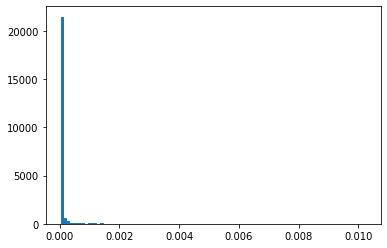

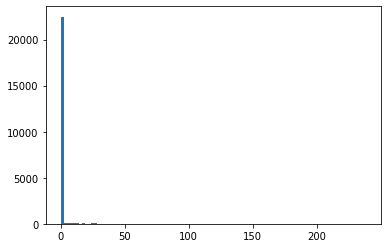

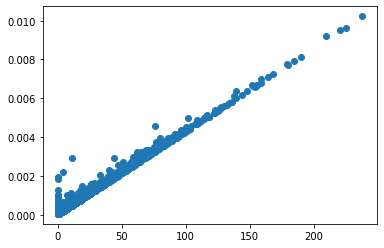

In [44]:
# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()), bins=100)
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees, bins=100)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

**Given the similarities of their histograms, it should not surprise you to see a perfect correlation between the centrality distribution and the degree distribution.**

## Graph Algorithms

### Finding Paths
- Pathfinding is important for:
 - Optimization:
   - finding the shortest transportation path between two nodes
   - shortest transport paths
 - Modeling:
   - the spread of things
   - disease spread
   - information spread in a social network
- How do we find out if there's a path between two nodes?
- If there's a path, how do we find out what the shortest path is?
- Algorithm: Breadth-first search
- Developed in the 1950s as a way of finding the shortest path out of a maze.
- Given the following network comprised of 11 nodes, and we want to find the shortest path between the yellow and red nodes.
- If we start at the yellow node, we first ask for the yellow node's neighbors.
- We then ask if the destination node is present in the set of yellow node's neighbors
- If not, we continue on.
- Going out a 2nd degree of separation, we ask for the neighbors of our neighbors.
- The destination node is still not present, so we continue on.
- On our 3rd degree of separation out, we see that the destination node is present.
- At this point, we can stop and ignore the next degree of separation.
- Note there was one other path possible, but it was longer.
- As such, with the breadth-first search algorithm, we have achieved our goal of finding the _shortest_ path between the pair of nodes.
- ![bfs][1]
- If we do `G.neighbors(1)`, we get back a list containing the nodes that are neighbors of `1`
- Let's go one degree out, to the first node in the list of node `1`'s neighbors, which is node `10`.
- Let's check the neighbors of `10`: note that we have `1`, which is correct, and then `19`, and then a whole slew of other nodes.
- Since `19`, our destination node, is present in the neighbors of node `10`, we can stop there.
- If `19` wasn't there, we would go on to check the neighbors of node `5`, which was the next node in the list of node `1`'s neighbors.

```python
G
>>> <networkx.classes.graph.Graph at 0x10cc08828>

len(G.edges())
>>> 57

len(G.nodes())
>>> 20

list(G.neighbors(1))
>>> [10, 5, 14, 7]

list(G.neighborys(10))
>>> [1, 19, 5, 17, 8, 9, 13, 14]
```

- This was a manual check, but in the exercises, you'll be implementing an automatic version of the breadth-first search algorithm.

  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/bfs.JPG

### Shortest Path I

You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

**Instructions**

- Create a function called `path_exists()` that has 3 parameters - `G`, `node1`, and `node2` - and returns whether or not a path exists between the two nodes.
- Initialize the queue of nodes to visit with the first node, `node1`. `queue` should be a list.
- Iterate over the nodes in `queue`.
- Get the neighbors of the node using the `.neighbors()` method of the graph `G`.
- Check to see if the destination node `node2` is in the set of `neighbors`. If it is, return `True`.

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

### Shortest Path II

Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the `else` condition; that is, if `node2` is not in `neighbors`.

**Instructions**

- Using the `.add()` method, add the current node `node` to the set `visited_nodes` to keep track of what nodes have already been visited.
- Add the _neighbors_ of the current node `node` that have not yet been visited to `queue`. To do this, you'll need to use the `.extend()` method of `queue` together with a list comprehension. The `.extend()` method appends all the items in a given list.
 - The _output expression_ and _iterator variable_ of the list comprehension are both `n`. The iterable is the list `neighbors`, and the conditional is if `n` is not in the visited nodes.

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

### Shortest Path III

This is the final exercise of this trio! You're now going to complete the problem by writing the code that returns `False` if there's no path between two nodes.

**Instructions**

- Check to see if the queue has been emptied. You can do this by inspecting the last element of queue with `[-1]`.
- Place the appropriate return statement for indicating whether there's a path between these two nodes.

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## Betweenness Centrality

- Let's revisit our notions of what it means to be an _important node_, but leveraging what we know about paths
- We're now going to learn about betweenness centrality, but before we talk about that, we need to extend our knowledge with one key concept - all shortest paths

### All Shortest Paths
- In the previous section, we learned about how to find the shortest path between any pair of nodes, using the breadth-first search algorithm.
- Imagine now we used the BFS to find every shortest path between every pair of nodes.
- What we would get back is the **set of _all shortest paths_** in a graph.
- In other word, _all shortest paths_ are the set of paths in a graph, such that **each path is the shortest path between a given pair of nodes**, done **for all pairs of nodes**.

### Betweenness Centrality
- Definition: $\frac{\text{num. shortest paths through node}}{\text{all possible shortest paths}}$
 - The number of shortest paths in a graph that pass through a node, divided by the number of shortest paths that exist between every pair of nodes in a graph.
 - This metric captures a different view of importance - in essence, it captures bottleneck nodes in a graph, rather that highly connected nodes; this will become much clearer as we go on.
- Where might betweenness centrality be useful?
- Application:
 - One example would be individuals that bridge between to communities
   - An individual bridging liberal-leaning and conservative-leaning Twitter users
 - Alternatively, consider the Internet, where there are crucial links that bridge two network of computers.
 - If we removed those crucial nodes in the Internet, then information will not flow (or at least not as easily) between subnetworks.
 
### Examples
- Singapore: Raffles & Jurong East
 - Let's look at the Singapore subway system to make this more concrete
 - Take a look at two sets of stations that have been circled with purple.
 - In the south, there's a cluster of stations in the central business district that serve as connectors between different lines, but there's also this other station called Jurong East, which is only connected to three other stations, but serves as a major transit connector point between the red and green lines.
 - ![singapore_map][1]
- Hight betweenness centrality, low degree centrality
- We have a graph `G` that is a barbell graph, which can be created as in the following code cells.
- `m1` is the number of nodes in the barbell ends, and `m2` is the number of nodes in the barbell bridge.
- The `keys` are the nodes, and the `values` are the `betweenness centrality` scores.
- Some values are `0` because they're located at the ends of the barbell graph and the nodes within each end are fully connected with one another.
- With the exception of the bridge node and the two nodes it's connected to, there's no shortest path that has to run through any of those nodes to get to other nodes.


  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/singapore_station_map.jpg

In [9]:
G = nx.barbell_graph(m1=5, m2=0)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5555555555555556,
 5: 0.5555555555555556,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

In [10]:
# nx.shortest_path(G, 0, 9)
dict(nx.shortest_paths.all_pairs_dijkstra(G))[0]

({0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 3, 8: 3, 9: 3},
 {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 4, 5],
  6: [0, 4, 5, 6],
  7: [0, 4, 5, 7],
  8: [0, 4, 5, 8],
  9: [0, 4, 5, 9]})

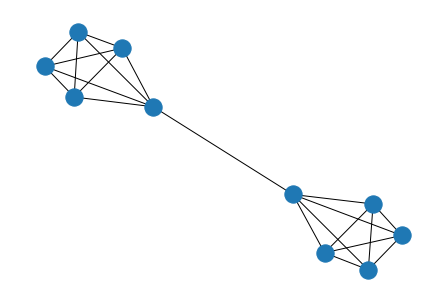

In [11]:
nx.draw(G)
plt.show()

In [27]:
nx.to_numpy_array(G)

array([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.]])

### NetworkX betweenness centrality on a social network

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the `nx.betweenness_centrality(G)` function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

**Instructions**

- Compute the betweenness centrality `bet_cen` of the nodes in the graph `T`.
- Compute the degree centrality `deg_cen` of the nodes in the graph `T`.
- Compare betweenness centrality to degree centrality by creating a scatterplot of the two, with `list(bet_cen.values())` on the x-axis and `list(deg_cen.values())` on the y-axis.

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(t_131)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(t_131)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.xlim(-0.00005, 0.0002)
plt.xticks(rotation=45)
plt.show()

### Deep dive - Twitter network

You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

NetworkX has been pre-imported for you as `nx`.

**Instructions**

- Write a function `find_nodes_with_highest_deg_cent(G)` that returns the node(s) with the highest degree centrality using the following steps:
 - Compute the degree centrality of `G`.
 - Compute the maximum degree centrality using the `max()` function on `list(deg_cent.values())`.
 - Iterate over the degree centrality dictionary, `deg_cent.items()`.
 - If the degree centrality value `v` of the current node `k` is equal to `max_dc`, add it to the set of nodes.
- Use your function to find the node(s) that has the highest degree centrality in `T`.
- Write an assertion statement that checks that the node(s) is/are correctly identified. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(f'It looks like node {top_dc} has the highest degree centrality')

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

### Deep dive - Twitter network part II

Next, you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using `nx.betweenness_centrality(G)`.

**Instructions**

- Write a function `find_node_with_highest_bet_cent(G)` that returns the node(s) with the highest betweenness centrality.
 - Compute the betweenness centrality of `G`.
 - Compute the maximum betweenness centrality using the `max()` function on `list(bet_cent.values())`.
 - Iterate over the degree centrality dictionary, `bet_cent.items()`.
 - If the degree centrality value `v` of the current node `k` is equal to `max_bc`, add it to the set of nodes.
- Use your function to find the node(s) that has the highest betweenness centrality in `T`.
- Write an assertion statement that you've got the right node. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(t_131)
print(f'Node {top_bc} has the highest betweenness centrality.')

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(t_131)[node] == max(nx.betweenness_centrality(t_131).values())

# Structures

This chapter is all about finding interesting structures within network data. You'll learn about essential concepts such as cliques, communities, and subgraphs, which will leverage all of the skills you acquired in Chapter 2. By the end of this chapter, you'll be ready to apply the concepts you've learned to a real-world case study.

## Communities & Cliques

- We're now going to explore the concepts of structures and subgraphs, using NetworkX.
- A lot of this is going to leverage what you've learned in the 2nd chapter, particularly on path finding and the use of neighbors.
- Have your ever been in a clique?
- How would you characterize the clique?
- It probably was comprised of people who know everybody else in the group to a pretty strong degree, right?
- Now imagine if there was another new person not originally part of the clique that joined in - now, in this group, it wouldn't feel like a _clique_, because the new person doesn't really know everybody else, and vise versa.
- ![cliques][1]
- In network theory, a _clique_ is essentially defined on the social version of a clique: 
 - A set of nodes that are completely connected by an edge to every other node in the set.
 - It is, then, a completely connected graph.
- What might be the _simplest clique_?
- By the definition of a clique, an edge is the simplest clique possible.
- Now, what would be the simplest _complex clique_?
 - 3 nodes fully connected, a triangle
- What are some applications of finding _triangles_ in a network?
 - One example is a friend recommendation system.
 - If `A` knows `B` and `A` knows `C`, but `B` and `C` are not yet connected, then there's a good chance that `B` knows `C` as well, and may want to be connected online, by doing what we call triangle closures.

### Clique Code
- How might you write code that finds all triangles that a node is involved in?
- That will be the exercise that you're going to go through.
- Suppose you had a graph `G`, and you wanted to iterate over every pair of nodes, and not only every edge.
- Rather than writing a nested for-loop, you might want to use the combinations function from the Python `itertool` module.
- In this way, your for-loop can iterate over every pair of nodes in the network, by using the following code



  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/cliques.JPG

In [ ]:
t_131

In [ ]:
for n in list(combinations(t_131.nodes(), 2))[:10]:
    print(n[0], n[1])

### Identifying triangle relationships

Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an `'occupation'` label associated with it, in which the Twitter user's work occupation is divided into `celebrity`, `politician` and `scientist`. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

**Instructions**

- Import `combinations` from `itertools`.
- Write a function `is_in_triangle()` that has two parameters - `G` and `n` - and checks whether a given node is in a triangle relationship or not.
 - `combinations(iterable, n)` returns combinations of size `n` from `iterable`. This will be useful here, as you want combinations of size `2` from `G.neighbors(n)`.
 - To check whether an edge exists between two nodes, use the `.has_edge(node1, node2)` method. If an edge exists, then the given node is in a triangle relationship, and you should return `True`.

In [ ]:
# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

is_in_triangle(T, 1)

In [ ]:
for node in sorted(list(T.nodes())[:60]):
    x = is_in_triangle(T, node)
    if x == True:
        print(f'{node}: {x}')

### Finding nodes involved in triangles

NetworkX provides an API for counting the number of triangles that every node is involved in: `nx.triangles(G)`. It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

**Instructions**

- Write a function `nodes_in_triangle()` that has two parameters - `G` and `n` - and identifies all nodes in a triangle relationship with a given node.
 - In the `for` loop, iterate over all possible triangle relationship combinations.
 - Check whether the nodes `n1` and `n2` have an edge between them. If they do, add both nodes to the set ``triangle_nodes``.
- Use your function in an `assert` statement to check that the number of nodes involved in a triangle relationship with node `1` of graph `T` is equal to `35`.

In [ ]:
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 23

### Finding open triangles

Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

**Instructions**

- Write a function `node_in_open_triangle()` that has two parameters - `G` and `n` - and identifies whether a node is present in an open triangle with its neighbors.
 - In the `for` loop, iterate over all possible triangle relationship combinations.
 - If the nodes `n1` and `n2` do not have an edge between them, set `in_open_triangle` to `True`, break out from the `if` statement and return `in_open_triangle`.
- Use this function to count the number of open triangles that exist in `T`.
 - In the `for` loop, iterate over all the nodes in `T`.
 - If the current node `n` is in an open triangle, increment `num_open_triangles`.

In [ ]:
# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(f'{num_open_triangles} nodes in graph T are in open triangles.')

## Maximal Cliques

- ![maximal_cliques][1]
- They are a clique, but that clique can't be extended by adding another node in the graph.
- For example, the sub-clique of the 3 green nodes can be extended by one blue node to form a large clique.
- As such, these 3 green nodes do not form a _maximal clique_ in the graph.
- The 4 nodes connected as a clique together cannot be extended and still remain a clique, as the remaining node is not fully connected to the other four nodes.
- As such, these four nodes constitute a _maximal clique_.

### Communities
- The concept of _maximal cliques_ has its uses in community finding algorithms.
- Without going into the myriad of details possible, I hope to define, at a basic level, what a community is.
- Cliques form a good starting point for finding communities, as they are fully connected subgraphs within a larger graph.
- By identifying these _maximal cliques_, one naive way of identifying communities might be identifying the unions of maximal cliques that share some number of members, but are also of some minimum size.

### NetworkX API
- NetworkX provides a function for finding all maximal cliques, which is the `find_clique` function.
 - Works for `Graph`, but doesn't work for `DiGraph`
- `find_cliqeus` will not just find any clique, but the set of _maximal cliques_.
- There are two _maximal cliques_ of size 5 in the graph.
- There are also two _maximal cliques_ of size 2 - these are the edges between nodes `4` and `5`, and nodes `5` and `6`.
- Recall that edges are also a clique.


  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/max_cliques.JPG

In [ ]:
G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)

In [ ]:
gl = list(nx.find_cliques(G))
print(gl)
nx.draw(G, with_labels=True)

In [ ]:
G2 = nx.barbell_graph(m1=5, m2=2)
gl2 = list(nx.find_cliques(G2))
print(gl2)
nx.draw(G2, with_labels=True)

### Finding all maximal cliques of size "n"

Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: `nx.find_cliques(G)`. Play around with the function by using it on `T` in the IPython Shell, and then try answering the exercise.

**Instructions**

- Write a function `maximal_cliques()` that has two parameters - `G` and `size` - and finds all maximal cliques of size `n`.
 - In the `for` loop, iterate over all the cliques in `G` using the `nx.find_cliques()` function.
 - If the current clique is of size `size`, append it to the list `mcs`.
- Use an assert statement and your `maximal_cliques()` function to check that there are `33` maximal cliques of size `3` in the graph `T`.

In [ ]:
nodes = {1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'celebrity'}, 22: {'category': 'D', 'occupation': 'scientist'}, 23: {'category': 'D', 'occupation': 'scientist'}, 24: {'category': 'P', 'occupation': 'politician'}, 25: {'category': 'I', 'occupation': 'celebrity'}, 26: {'category': 'P', 'occupation': 'celebrity'}, 27: {'category': 'D', 'occupation': 'scientist'}, 28: {'category': 'P', 'occupation': 'celebrity'}, 29: {'category': 'I', 'occupation': 'celebrity'}, 30: {'category': 'P', 'occupation': 'scientist'}, 31: {'category': 'D', 'occupation': 'scientist'}, 32: {'category': 'P', 'occupation': 'politician'}, 33: {'category': 'I', 'occupation': 'politician'}, 34: {'category': 'D', 'occupation': 'celebrity'}, 35: {'category': 'P', 'occupation': 'scientist'}, 36: {'category': 'D', 'occupation': 'scientist'}, 37: {'category': 'I', 'occupation': 'scientist'}, 38: {'category': 'P', 'occupation': 'celebrity'}, 39: {'category': 'D', 'occupation': 'celebrity'}, 40: {'category': 'I', 'occupation': 'celebrity'}, 41: {'category': 'I', 'occupation': 'celebrity'}, 42: {'category': 'P', 'occupation': 'scientist'}, 43: {'category': 'I', 'occupation': 'celebrity'}, 44: {'category': 'I', 'occupation': 'politician'}, 45: {'category': 'D', 'occupation': 'scientist'}, 46: {'category': 'I', 'occupation': 'politician'}, 47: {'category': 'I', 'occupation': 'celebrity'}, 48: {'category': 'P', 'occupation': 'celebrity'}, 49: {'category': 'P', 'occupation': 'politician'}}
edges = [(1, 3, {'date': date(2012, 11, 16)}), (1, 4, {'date': date(2013, 6, 7)}), (1, 5, {'date': date(2009, 7, 27)}), (1, 6, {'date': date(2014, 12, 18)}), (1, 7, {'date': date(2010, 10, 18)}), (1, 8, {'date': date(2012, 4, 18)}), (1, 9, {'date': date(2007, 10, 14)}), (1, 10, {'date': date(2012, 9, 8)}), (1, 11, {'date': date(2010, 1, 6)}), (1, 12, {'date': date(2012, 12, 27)}), (1, 13, {'date': date(2008, 12, 18)}), (1, 14, {'date': date(2014, 5, 25)}), (1, 15, {'date': date(2009, 11, 12)}), (1, 16, {'date': date(2008, 8, 6)}), (1, 17, {'date': date(2007, 8, 11)}), (1, 18, {'date': date(2009, 10, 7)}), (1, 19, {'date': date(2008, 7, 24)}), (1, 20, {'date': date(2013, 11, 18)}), (1, 21, {'date': date(2011, 3, 28)}), (1, 22, {'date': date(2013, 3, 4)}), (1, 23, {'date': date(2012, 4, 20)}), (1, 24, {'date': date(2009, 6, 6)}), (1, 25, {'date': date(2013, 6, 18)}), (1, 26, {'date': date(2014, 11, 20)}), (1, 27, {'date': date(2007, 4, 28)}), (1, 28, {'date': date(2014, 3, 28)}), (1, 29, {'date': date(2014, 1, 23)}), (1, 30, {'date': date(2007, 10, 9)}), (1, 31, {'date': date(2009, 2, 17)}), (1, 32, {'date': date(2009, 10, 14)}), (1, 33, {'date': date(2010, 5, 19)}), (1, 34, {'date': date(2009, 12, 21)}), (1, 35, {'date': date(2014, 11, 16)}), (1, 36, {'date': date(2010, 2, 25)}), (1, 37, {'date': date(2010, 9, 23)}), (1, 38, {'date': date(2007, 4, 28)}), (1, 39, {'date': date(2007, 4, 8)}), (1, 40, {'date': date(2010, 5, 15)}), (1, 41, {'date': date(2009, 8, 12)}), (1, 42, {'date': date(2013, 3, 9)}), (1, 43, {'date': date(2011, 11, 14)}), (1, 44, {'date': date(2013, 4, 6)}), (1, 45, {'date': date(2010, 1, 18)}), (1, 46, {'date': date(2011, 8, 20)}), (1, 47, {'date': date(2014, 8, 3)}), (1, 48, {'date': date(2010, 3, 15)}), (1, 49, {'date': date(2007, 9, 2)}), (5, 19, {'date': date(2013, 6, 12)}), (5, 28, {'date': date(2010, 12, 4)}), (5, 36, {'date': date(2013, 4, 7)}), (7, 28, {'date': date(2011, 11, 21)}), (8, 19, {'date': date(2010, 11, 5)}), (8, 28, {'date': date(2007, 6, 26)}), (11, 19, {'date': date(2012, 4, 16)}), (11, 28, {'date': date(2011, 6, 21)}), (13, 19, {'date': date(2012, 12, 13)}), (14, 28, {'date': date(2013, 12, 18)}), (15, 19, {'date': date(2008, 12, 13)}), (15, 28, {'date': date(2014, 6, 3)}), (16, 18, {'date': date(2008, 8, 5)}), (16, 35, {'date': date(2014, 6, 4)}), (16, 36, {'date': date(2008, 10, 10)}), (16, 48, {'date': date(2014, 1, 27)}), (17, 19, {'date': date(2007, 11, 11)}), (17, 28, {'date': date(2012, 10, 11)}), (18, 24, {'date': date(2009, 2, 4)}), (18, 35, {'date': date(2008, 12, 1)}), (18, 36, {'date': date(2013, 2, 6)}), (19, 20, {'date': date(2008, 11, 9)}), (19, 21, {'date': date(2007, 7, 23)}), (19, 24, {'date': date(2013, 12, 13)}), (19, 30, {'date': date(2012, 6, 6)}), (19, 31, {'date': date(2011, 1, 27)}), (19, 35, {'date': date(2014, 3, 3)}), (19, 36, {'date': date(2007, 10, 22)}), (19, 37, {'date': date(2008, 4, 20)}), (19, 48, {'date': date(2010, 12, 23)}), (20, 28, {'date': date(2012, 4, 15)}), (21, 28, {'date': date(2014, 4, 27)}), (24, 28, {'date': date(2013, 1, 27)}), (24, 36, {'date': date(2009, 4, 23)}), (24, 37, {'date': date(2008, 6, 27)}), (24, 39, {'date': date(2007, 1, 27)}), (24, 43, {'date': date(2014, 2, 12)}), (25, 28, {'date': date(2014, 5, 9)}), (27, 28, {'date': date(2007, 8, 9)}), (28, 29, {'date': date(2012, 4, 3)}), (28, 30, {'date': date(2007, 12, 2)}), (28, 31, {'date': date(2008, 6, 1)}), (28, 35, {'date': date(2012, 11, 16)}), (28, 36, {'date': date(2012, 9, 26)}), (28, 37, {'date': date(2014, 11, 12)}), (28, 44, {'date': date(2007, 11, 18)}), (28, 48, {'date': date(2008, 5, 25)}), (28, 49, {'date': date(2011, 12, 19)}), (29, 43, {'date': date(2014, 6, 4)}), (33, 39, {'date': date(2011, 9, 5)}), (35, 36, {'date': date(2008, 12, 1)}), (35, 37, {'date': date(2014, 5, 7)}), (35, 39, {'date': date(2007, 6, 17)}), (35, 43, {'date': date(2009, 6, 10)}), (36, 37, {'date': date(2014, 5, 13)}), (36, 39, {'date': date(2014, 12, 6)}), (36, 43, {'date': date(2013, 12, 17)}), (37, 43, {'date': date(2012, 1, 22)}), (38, 39, {'date': date(2009, 5, 15)}), (39, 40, {'date': date(2011, 6, 3)}), (39, 41, {'date': date(2009, 10, 5)}), (39, 45, {'date': date(2011, 1, 12)}), (41, 45, {'date': date(2009, 9, 7)}), (43, 47, {'date': date(2014, 12, 21)}), (43, 48, {'date': date(2013, 1, 28)})]

t_321 = nx.Graph()
t_321.add_nodes_from(nodes)
t_321.add_edges_from(edges)
nx.set_node_attributes(t_321, nodes)

In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, n):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == n:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(t_321, 3)) == 33

## Subgraphs

- When you have a large graph, and you want to visualize just a small portion of it, it can be helpful to extract those nodes and their associated edges as a separate graph object.
- For example, you might want to visualized a particular path through the network, or you might want to visualized a particular community or clique.
- Alternatively, you might just want to explore the structure of the graph around a node out of a number of degrees of separation.
- In all of these scenarios, it's useful to be able to "slice out" the nodes and edges of interest, and visualize them.

In [ ]:
random.seed(121)
G = nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
nodes = list(G.neighbors(8))
nodes

In [ ]:
nodes.append(8)
G_eight = G.subgraph(nodes)
G_eight.edges()

In [ ]:
display(G_eight)
display(G)

In [ ]:
nx.draw(G_eight, with_labels=True)

### Subgraphs I

There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using `G.subgraph(nodes)`, which returns a new `graph` object (of the same type as the original graph) that is comprised of the iterable of `nodes` that was passed in.

`matplotlib.pyplot` has been imported for you as `plt`.

**Instructions**

- Write a function `get_nodes_and_nbrs(G, nodes_of_interest)` that extracts the subgraph from graph `G` comprised of the `nodes_of_interest` and their neighbors.
 - In the first `for` loop, iterate over `nodes_of_interest` and append the current node `n` to `nodes_to_draw`.
 - In the second `for` loop, iterate over the neighbors of `n`, and append all the neighbors `nbr` to `nodes_to_draw`.
- Use the function to extract the subgraph from `T` comprised of nodes 29, 38, and 42 (contained in the pre-defined list `nodes_of_interest`) and their neighbors. Save the result as `T_draw`.
- Draw the subgraph `T_draw` to the screen.

In [ ]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

### Subgraphs II

In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

**Instructions**

- Using a list comprehension, extract nodes that have the metadata `'occupation'` as `'celebrity'` alongside their neighbors:
 - The _output expression_ of the list comprehension is `n`, and there are two _iterator variables_: `n` and `d`. The iterable is the list of nodes of `T` (including the metadata, which you can specify using `data=True`) and the conditional expression is if the `'occupation'` key of the metadata dictionary `d` equals `'celebrity'`.
- Place them in a new subgraph called `T_sub`. To do this:
 - Iterate over the nodes, compute the neighbors of each node, and add them to the set of nodes `nodeset` by using the `.union()` method. This last part has been done for you.
 - Use `nodeset` along with the `T.subgraph()` method to calculate `T_sub`.
- Draw `T_sub` to the screen.

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in t_321.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = t_321.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = t_321.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub, with_labels=True)
plt.show()

# Bringing it all together

In this final chapter of the course, you'll consolidate everything you've learned through an in-depth case study of GitHub collaborator network data. This is a great example of real-world social network data, and your newly acquired skills will be fully tested. By the end of this chapter, you'll have developed your very own recommendation system to connect GitHub users who should collaborate together.

## Case Study

### Data
- This dataset is a GitHub user collaboration network.
- GitHub is a social coding site, where users can collaborate on code repositories.
- In this network, nodes are users, and edges indicate that two users are collaborators on at least one GitHub repository.
- What you'll be accomplishing by the end of the exercises is the following:
 - You will have analyzed the structure of the graph, including its basic properties.
 - You will visualize the graph using `nxviz`
 - You will build a simple recommendation system.
   - A recommendation system in social networks recommends users to "connect" with one another in some fashion.
   - In the GitHub context, we will try writing a recommender that suggests users that should collaborate together.

### Graph properties
- Recall from the first chapter about some basic functions for getting a graph's size.

In [ ]:
random.seed(121)
G = nx.erdos_renyi_graph(n=20, p=0.2)
print(len(G.edges()))
print(len(G.nodes()))

- Are you able to recall what the function names are for computing the degree and betweenness centralities of each node in the graph?
 - `nx.degree_centrality(G)`
 - `nx.betweenness_centrality(G)`
 - In both cases, the key is the node name and the value is the centrality score

In [ ]:
pp(nx.degree_centrality(G))
print('\n')
pp(nx.betweenness_centrality(G))

### Characterizing the network (I)
To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges in a network. It has been pre-loaded as `G` and is available for exploration in the IPython Shell. Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions `len(G.nodes())` and `len(G.edges())` to calculate the number of nodes and edges respectively.

- ~~72900 nodes, 56519 edges.~~
- **56519 nodes, 72900 edges.**
- ~~47095 nodes, 65789 edges.~~
- ~~63762 nodes, 71318 edges.~~

In [ ]:
G = nx.Graph(Gh)
print(len(G.nodes()))
print(len(G.edges()))

### Characterizing the network (II)

Let's continue recalling what you've learned before about node importances, by plotting the degree distribution of a network. This is the distribution of node degrees computed across all nodes in a network.

**Instructions**

- Plot the degree distribution of the GitHub collaboration network `G`. Recall that there are four steps involved here:
 - Calculating the degree centrality of `G`.
 - Using the `.values()` method of `G` and converting it into a list.
 - Passing the list of degree distributions to `plt.hist()`.
 - Displaying the histogram with `plt.show()`.

In [ ]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

### Characterizing the network (III)

The last exercise was on degree centrality; this time round, let's recall betweenness centrality!

A small note: if executed correctly, this exercise may need about 5 seconds to execute.

**Instructions**

- Plot the betweenness centrality distribution of the GitHub collaboration network. You have to follow exactly the same four steps as in the previous exercise, substituting `nx.betweenness_centrality()` in place of `nx.degree_centrality()`.

In [ ]:
nodes = {'u41': {'bipartite': 'users', 'grouping': 0}, 'u69': {'bipartite': 'users', 'grouping': 0}, 'u96': {'bipartite': 'users', 'grouping': 0}, 'u156': {'bipartite': 'users', 'grouping': 0}, 'u297': {'bipartite': 'users', 'grouping': 0}, 'u298': {'bipartite': 'users', 'grouping': 0}, 'u315': {'bipartite': 'users', 'grouping': 0}, 'u322': {'bipartite': 'users', 'grouping': 0}, 'u435': {'bipartite': 'users', 'grouping': 0}, 'u440': {'bipartite': 'users', 'grouping': 0}, 'u640': {'bipartite': 'users', 'grouping': 0}, 'u655': {'bipartite': 'users', 'grouping': 0}, 'u698': {'bipartite': 'users', 'grouping': 0}, 'u821': {'bipartite': 'users', 'grouping': 0}, 'u863': {'bipartite': 'users', 'grouping': 0}, 'u901': {'bipartite': 'users', 'grouping': 0}, 'u914': {'bipartite': 'users', 'grouping': 0}, 'u1254': {'bipartite': 'users', 'grouping': 0}, 'u1407': {'bipartite': 'users', 'grouping': 0}, 'u1468': {'bipartite': 'users', 'grouping': 0}, 'u1908': {'bipartite': 'users', 'grouping': 0}, 'u2022': {'bipartite': 'users', 'grouping': 0}, 'u2066': {'bipartite': 'users', 'grouping': 0}, 'u2137': {'bipartite': 'users', 'grouping': 0}, 'u2289': {'bipartite': 'users', 'grouping': 0}, 'u2482': {'bipartite': 'users', 'grouping': 0}, 'u2552': {'bipartite': 'users', 'grouping': 0}, 'u2643': {'bipartite': 'users', 'grouping': 0}, 'u2737': {'bipartite': 'users', 'grouping': 0}, 'u2906': {'bipartite': 'users', 'grouping': 0}, 'u3083': {'bipartite': 'users', 'grouping': 0}, 'u3174': {'bipartite': 'users', 'grouping': 0}, 'u3231': {'bipartite': 'users', 'grouping': 0}, 'u3243': {'bipartite': 'users', 'grouping': 0}, 'u3271': {'bipartite': 'users', 'grouping': 0}, 'u3658': {'bipartite': 'users', 'grouping': 0}, 'u3974': {'bipartite': 'users', 'grouping': 0}, 'u3979': {'bipartite': 'users', 'grouping': 0}, 'u4159': {'bipartite': 'users', 'grouping': 0}, 'u4199': {'bipartite': 'users', 'grouping': 0}, 'u4329': {'bipartite': 'users', 'grouping': 0}, 'u4412': {'bipartite': 'users', 'grouping': 0}, 'u4513': {'bipartite': 'users', 'grouping': 0}, 'u4710': {'bipartite': 'users', 'grouping': 0}, 'u4761': {'bipartite': 'users', 'grouping': 0}, 'u4953': {'bipartite': 'users', 'grouping': 0}, 'u5082': {'bipartite': 'users', 'grouping': 0}, 'u5337': {'bipartite': 'users', 'grouping': 0}, 'u5693': {'bipartite': 'users', 'grouping': 0}, 'u5993': {'bipartite': 'users', 'grouping': 0}, 'u6081': {'bipartite': 'users', 'grouping': 0}, 'u7418': {'bipartite': 'users', 'grouping': 0}, 'u7623': {'bipartite': 'users', 'grouping': 0}, 'u7963': {'bipartite': 'users', 'grouping': 0}, 'u8135': {'bipartite': 'users', 'grouping': 0}, 'u9866': {'bipartite': 'users', 'grouping': 0}, 'u9869': {'bipartite': 'users', 'grouping': 0}, 'u9997': {'bipartite': 'users', 'grouping': 0}, 'u10090': {'bipartite': 'users', 'grouping': 0}, 'u10340': {'bipartite': 'users', 'grouping': 0}, 'u10500': {'bipartite': 'users', 'grouping': 0}, 'u10603': {'bipartite': 'users', 'grouping': 0}, 'u14964': {'bipartite': 'users', 'grouping': 1}}
edges = [('u41', 'u2022', {}), ('u41', 'u69', {}), ('u41', 'u5082', {}), ('u41', 'u298', {}), ('u41', 'u901', {}), ('u69', 'u315', {}), ('u69', 'u4513', {}), ('u69', 'u5082', {}), ('u69', 'u901', {}), ('u69', 'u298', {}), ('u69', 'u2022', {}), ('u96', 'u315', {}), ('u96', 'u2482', {}), ('u96', 'u10500', {}), ('u96', 'u2022', {}), ('u96', 'u863', {}), ('u96', 'u9997', {}), ('u96', 'u297', {}), ('u96', 'u698', {}), ('u96', 'u2066', {}), ('u96', 'u7963', {}), ('u96', 'u156', {}), ('u96', 'u2906', {}), ('u96', 'u2552', {}), ('u156', 'u315', {}), ('u156', 'u2482', {}), ('u156', 'u10500', {}), ('u156', 'u863', {}), ('u156', 'u2022', {}), ('u156', 'u297', {}), ('u156', 'u9997', {}), ('u156', 'u698', {}), ('u156', 'u2066', {}), ('u156', 'u7963', {}), ('u156', 'u2906', {}), ('u156', 'u2552', {}), ('u297', 'u315', {}), ('u297', 'u2482', {}), ('u297', 'u863', {}), ('u297', 'u2022', {}), ('u297', 'u9997', {}), ('u297', 'u698', {}), ('u297', 'u10500', {}), ('u297', 'u2066', {}), ('u297', 'u7963', {}), ('u297', 'u2906', {}), ('u297', 'u2552', {}), ('u298', 'u5082', {}), ('u298', 'u901', {}), ('u298', 'u2022', {}), ('u315', 'u2482', {}), ('u315', 'u10500', {}), ('u315', 'u2022', {}), ('u315', 'u863', {}), ('u315', 'u9997', {}), ('u315', 'u698', {}), ('u315', 'u2066', {}), ('u315', 'u7963', {}), ('u315', 'u2906', {}), ('u315', 'u4513', {}), ('u315', 'u2552', {}), ('u322', 'u3174', {}), ('u322', 'u3974', {}), ('u322', 'u7623', {}), ('u322', 'u8135', {}), ('u322', 'u2022', {}), ('u322', 'u4953', {}), ('u322', 'u640', {}), ('u322', 'u4412', {}), ('u322', 'u10340', {}), ('u322', 'u4159', {}), ('u322', 'u1908', {}), ('u322', 'u3979', {}), ('u322', 'u435', {}), ('u322', 'u821', {}), ('u322', 'u9869', {}), ('u322', 'u9866', {}), ('u322', 'u10603', {}), ('u322', 'u3083', {}), ('u322', 'u4710', {}), ('u435', 'u7623', {}), ('u435', 'u8135', {}), ('u435', 'u2022', {}), ('u435', 'u10603', {}), ('u435', 'u10340', {}), ('u435', 'u9866', {}), ('u440', 'u5693', {}), ('u440', 'u2643', {}), ('u440', 'u10090', {}), ('u440', 'u3271', {}), ('u640', 'u1908', {}), ('u640', 'u3174', {}), ('u640', 'u3979', {}), ('u640', 'u3974', {}), ('u640', 'u821', {}), ('u640', 'u4953', {}), ('u640', 'u4412', {}), ('u640', 'u9869', {}), ('u640', 'u4159', {}), ('u640', 'u4710', {}), ('u640', 'u3083', {}), ('u655', 'u2643', {}), ('u655', 'u2906', {}), ('u655', 'u2137', {}), ('u655', 'u914', {}), ('u655', 'u4513', {}), ('u698', 'u10500', {}), ('u698', 'u2066', {}), ('u698', 'u2906', {}), ('u698', 'u2552', {}), ('u698', 'u9997', {}), ('u698', 'u7963', {}), ('u698', 'u2482', {}), ('u698', 'u863', {}), ('u698', 'u2022', {}), ('u821', 'u3174', {}), ('u821', 'u3974', {}), ('u821', 'u4953', {}), ('u821', 'u4412', {}), ('u821', 'u4159', {}), ('u821', 'u1908', {}), ('u821', 'u3979', {}), ('u821', 'u9869', {}), ('u821', 'u4710', {}), ('u821', 'u3083', {}), ('u863', 'u10500', {}), ('u863', 'u2022', {}), ('u863', 'u7963', {}), ('u863', 'u2906', {}), ('u863', 'u2482', {}), ('u863', 'u9997', {}), ('u863', 'u2552', {}), ('u863', 'u2066', {}), ('u901', 'u2022', {}), ('u901', 'u5082', {}), ('u914', 'u2022', {}), ('u914', 'u3231', {}), ('u1254', 'u2737', {}), ('u1254', 'u2289', {}), ('u1254', 'u2643', {}), ('u1254', 'u4329', {}), ('u1254', 'u4761', {}), ('u1407', 'u2643', {}), ('u1407', 'u6081', {}), ('u1407', 'u3658', {}), ('u1468', 'u5993', {}), ('u1468', 'u2643', {}), ('u1468', 'u2022', {}), ('u1468', 'u7418', {}), ('u1468', 'u5337', {}), ('u1468', 'u9869', {}), ('u1908', 'u3174', {}), ('u1908', 'u3979', {}), ('u1908', 'u3974', {}), ('u1908', 'u4953', {}), ('u1908', 'u4412', {}), ('u1908', 'u9869', {}), ('u1908', 'u4159', {}), ('u1908', 'u4710', {}), ('u1908', 'u3083', {}), ('u2022', 'u2482', {}), ('u2022', 'u5993', {}), ('u2022', 'u7623', {}), ('u2022', 'u8135', {}), ('u2022', 'u10500', {}), ('u2022', 'u10340', {}), ('u2022', 'u9997', {}), ('u2022', 'u3231', {}), ('u2022', 'u2643', {}), ('u2022', 'u2906', {}), ('u2022', 'u5082', {}), ('u2022', 'u4199', {}), ('u2022', 'u9869', {}), ('u2022', 'u2066', {}), ('u2022', 'u9866', {}), ('u2022', 'u7418', {}), ('u2022', 'u7963', {}), ('u2022', 'u5337', {}), ('u2022', 'u10603', {}), ('u2022', 'u2552', {}), ('u2066', 'u10500', {}), ('u2066', 'u7963', {}), ('u2066', 'u2906', {}), ('u2066', 'u2482', {}), ('u2066', 'u9997', {}), ('u2066', 'u2552', {}), ('u2137', 'u2643', {}), ('u2137', 'u4513', {}), ('u2289', 'u4329', {}), ('u2289', 'u4761', {}), ('u2289', 'u2643', {}), ('u2289', 'u2737', {}), ('u2482', 'u10500', {}), ('u2482', 'u7963', {}), ('u2482', 'u2906', {}), ('u2482', 'u9997', {}), ('u2482', 'u2552', {}), ('u2552', 'u10500', {}), ('u2552', 'u9997', {}), ('u2552', 'u2906', {}), ('u2552', 'u7963', {}), ('u2643', 'u10090', {}), ('u2643', 'u5993', {}), ('u2643', 'u5693', {}), ('u2643', 'u4329', {}), ('u2643', 'u4761', {}), ('u2643', 'u9869', {}), ('u2643', 'u6081', {}), ('u2643', 'u2737', {}), ('u2643', 'u3658', {}), ('u2643', 'u3243', {}), ('u2643', 'u7418', {}), ('u2643', 'u5337', {}), ('u2643', 'u4513', {}), ('u2643', 'u3271', {}), ('u2737', 'u4329', {}), ('u2737', 'u4761', {}), ('u2906', 'u10500', {}), ('u2906', 'u9997', {}), ('u2906', 'u7963', {}), ('u3083', 'u3174', {}), ('u3083', 'u3974', {}), ('u3083', 'u4953', {}), ('u3083', 'u4412', {}), ('u3083', 'u4159', {}), ('u3083', 'u3979', {}), ('u3083', 'u9869', {}), ('u3083', 'u4710', {}), ('u3174', 'u3974', {}), ('u3174', 'u4953', {}), ('u3174', 'u4412', {}), ('u3174', 'u4159', {}), ('u3174', 'u3979', {}), ('u3174', 'u9869', {}), ('u3174', 'u4710', {}), ('u3231', 'u4159', {}), ('u3243', 'u3271', {}), ('u3271', 'u10090', {}), ('u3271', 'u5693', {}), ('u3658', 'u6081', {}), ('u3974', 'u4953', {}), ('u3974', 'u4412', {}), ('u3974', 'u4159', {}), ('u3974', 'u3979', {}), ('u3974', 'u9869', {}), ('u3974', 'u4710', {}), ('u3979', 'u4953', {}), ('u3979', 'u4412', {}), ('u3979', 'u4159', {}), ('u3979', 'u9869', {}), ('u3979', 'u4710', {}), ('u4159', 'u4412', {}), ('u4159', 'u9869', {}), ('u4159', 'u4710', {}), ('u4159', 'u4953', {}), ('u4329', 'u4761', {}), ('u4412', 'u4953', {}), ('u4412', 'u9869', {}), ('u4412', 'u4710', {}), ('u4710', 'u4953', {}), ('u4710', 'u9869', {}), ('u4953', 'u9869', {}), ('u5337', 'u5993', {}), ('u5337', 'u7418', {}), ('u5337', 'u9869', {}), ('u5693', 'u10090', {}), ('u5993', 'u7418', {}), ('u5993', 'u9869', {}), ('u7418', 'u9869', {}), ('u7623', 'u8135', {}), ('u7623', 'u10603', {}), ('u7623', 'u10340', {}), ('u7623', 'u9866', {}), ('u7963', 'u10500', {}), ('u7963', 'u9997', {}), ('u8135', 'u10603', {}), ('u8135', 'u10340', {}), ('u8135', 'u9866', {}), ('u9866', 'u10603', {}), ('u9866', 'u10340', {}), ('u9997', 'u10500', {}), ('u10340', 'u10603', {})]

g_413 = nx.Graph()
g_413.add_nodes_from(nodes)
g_413.add_edges_from(edges)
nx.set_node_attributes(g_413, nodes)

In [ ]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(g_413).values()))
plt.show()

## Case Study: Visualization

- Practicing drawing Circos, Hive and Arc plots

### Connected component subgraphs
- The following figure contains two connected component subgraphs
- The one on the left, containing the yellow node, and the one on the right containing the purple node.
- There are no edges connecting the left graph to the right graph.
- A connected component subgraph is a set of nodes connected to one another by some path in the subgraph, and not connected to other nodes in the larger graph.
- ![connected_component_subgraph][1]

  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/con_com_sub.JPG

In [ ]:
random.seed(121)
G = nx.erdos_renyi_graph(n=20, p=0.3)
circ = nv.CircosPlot(g_413)  # node_color='key', node_group='key')
circ.draw()

In [ ]:
random.seed(60)
G = nx.erdos_renyi_graph(n=100, p=0.03)
nx.connected_components(G)  # connected_componet_subgraphs() is deprecated

In [ ]:
subgraphs = [G.subgraph(c) for c in nx.connected_components(G)]
subgraphs

In [ ]:
for sg in subgraphs:
    print(f'Subgraph has {len(sg.nodes())} nodes')
    nx.draw(sg, with_labels=True)
    plt.show()

### MatrixPlot

Let's now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

**Instructions**

- Make a MatrixPlot visualization of the largest connected component subgraph, with authors grouped by their user group number.
 - First, calculate the largest connected component subgraph by using the` nx.connected_component_subgraphs(G)` inside the provided `sorted()` function. Python's built-in [sorted()][1] **function** takes an iterable and returns a sorted list (in ascending order, by default). Therefore, to access the largest connected component subgraph, the statement is sliced with `[-1]`.
 - Create the `MatrixPlot` object `h`. You have to specify the parameters `graph` and `node_grouping` to be the largest connected component subgraph and `'grouping'`, respectively.
 - Draw the `MatrixPlot` object to the screen and display the plot.
 
 
  [1]: https://docs.python.org/2/library/functions.html#sorted

In [ ]:
subgraphs = [g_413.subgraph(c) for c in nx.connected_components(g_413)]
subgraphs

In [ ]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(subgraphs, key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = nv.MatrixPlot(largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

**Recall that in a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.**

In [ ]:
plt.figure(figsize=(15, 15))
nx.draw(largest_ccs, with_labels=True, figsize=(15, 15))
plt.show()

### ArcPlot

Next up, let's use the ArcPlot to visualize the network. You're going to practice sorting the nodes in the graph as well.

Note: this exercise may take about 4-7 seconds to execute if done correctly.

**Instructions**

- Make an ArcPlot of the GitHub collaboration network, with authors sorted by degree. To do this:
 - Iterate over all the nodes in `G`, including the metadata (by specifying `data=True`).
 - In each iteration of the loop, calculate the degree of each node `n` with `nx.degree()` and set its `'degree'` attribute. `nx.degree()` accepts two arguments: A graph and a node.
 - Create the `ArcPlot` object `a` by specifying two parameters: the `graph`, which is `G`, and the `node_order`, which is `'degree'`, so that the nodes are sorted.
 - Draw the `ArcPlot` object to the screen.

In [ ]:
# Iterate over all the nodes in G, including the metadata
for n, d in g_413.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    g_413.nodes[n]['degree'] = nx.degree(g_413, n)

# Create the ArcPlot object: a
a = nv.ArcPlot(g_413, node_order='degree', node_grouping='grouping', node_color='grouping', figsize=(8, 8))

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### CircosPlot

Finally, you're going to make a CircosPlot of the network!

**Instructions**

- Make a CircosPlot of the network, again, with GitHub users sorted by their degree, and grouped and `coloured` by their 'grouping' key. To do this:
 - Iterate over all the nodes in `G`, including the metadata (by specifying `data=True`).
 - In each iteration of the loop, calculate the degree of each node `n` with `nx.degree()` and set its `'degree'` attribute.
 - Create the `CircosPlot` object `c` by specifying three parameters in addition to the graph `G`: the `node_order`, which is `'degree'`, the `node_grouping` and the `node_color`, which are both `'grouping'`.
 - Draw the `CircosPlot` object to the screen.

In [ ]:
# Iterate over all the nodes in G, including the metadata
for n, d in g_413.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    g_413.nodes[n]['degree'] = nx.degree(g_413, n)

# Create the ArcPlot object: a
a = nv.CircosPlot(g_413, node_order='degree', node_grouping='grouping', node_color='grouping', figsize=(8, 8))

# Draw the ArcPlot to the screen
a.draw()
plt.show()

**This CircosPlot provides a compact alternative to the ArcPlot. It is easy to see in this plot that most users belong to one group.**

## Case Study: Cliques

- A group of nodes that are fully connected to one another.
- The simplest clique is an edge and the simplest "complex" clique is a triangle.
- A maximal clique is a clique that cannot be extended by adding another node in the graph.

In [ ]:
G = nx.erdos_renyi_graph(n=100, p=0.15)
print(nx.find_cliques(G))

clique_lens = Counter([len(clique) for clique in nx.find_cliques(G)])
clique_lens

### Finding cliques (I)

You're now going to practice finding cliques in `G`. Recall that cliques are "groups of nodes that are fully connected to one another", while a maximal clique is a clique that cannot be extended by adding another node in the graph.

**Instructions**

- Count the number of maximal cliques present in the graph and print it.
 - Use the `nx.find_cliques()` function of `G` to find the maximal cliques.
 - The `nx.find_cliques()` function returns a generator object. To count the number of maximal cliques, you need to first convert it to a list with `list()` and then use the `len()` function. Place this inside a `print()` function to print it.

In [ ]:
cliques = sorted([len(cl) for cl in nx.find_cliques(g_413)], reverse=True)
print(cliques)
print(f'There are {len(cliques)} cliques.')

### Finding cliques (II)

Let's continue by finding a particular maximal clique, and then plotting that clique.

**Instructions**

- Find the author(s) that are part of the largest maximal clique, and plot the subgraph of that/one of those clique(s) using a CircosPlot. To do this:
 - Use the `nx.find_cliques()` function to calculate the maximal cliques in `G`. Place this within the provided `sorted()` function to calculate the largest maximal clique.
 - Create the subgraph consisting of the largest maximal clique using the `.subgraph()` method and `largest_clique`.
 - Create the `CircosPlot` object using the subgraph `G_lc` (without any other arguments) and plot it.

In [ ]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(g_413), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = g_413.subgraph(largest_clique)

# Create the CircosPlot object: c
c = nv.CircosPlot(G_lc, node_labels=True, figsize=(8, 8))

# Draw the CircosPlot to the screen
print(f'The largest maximal clique consists of {len(largest_clique)} users')
c.draw()
plt.show()

## Case Study: Final Tasks

- Find important GitHub users based on their collaborative relationships
 - Look for GitHub users that share collaborations with the most number of other users.
 - _degree centrality_
- Find the largest communities of collaborators.
 - You'll be looking for the largest communities of collaborators.
 - _maximal clique_
- Guild a recommendation system for GitHub users based on the concept of open triangles.
 - _open triangles_: I'm connected to two people who are not connected to one another

### Finding important collaborators

You'll now look at important nodes once more. Here, you'll make use of the `degree_centrality()` and `betweenness_centrality()` functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

**Instructions**

- Compute the degree centralities of `G`. Store the result as `deg_cent`.
- Compute the maximum degree centrality. Since `deg_cent` is a dictionary, you'll have to use the `.values()` method to get a list of its values before computing the maximum degree centrality with `max()`.
- Identify the most prolific collaborators using a list comprehension:
 - Iterate over the degree centrality dictionary `deg_cent` that was computed earlier using its `.items()` method. What condition should be satisfied if you are seeking to find user(s) that have collaborated with the most number of users? _Hint_: It has do to with the maximum degree centrality.
- Hit 'Submit Answer' to see who the most prolific collaborator(s) is/are!

In [ ]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(g_413)

# Sorting the dictionary
deg_cent = {k: v for k, v in sorted(deg_cent.items(), key=lambda item: item[1], reverse=True)}

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(f'The most prolific collaborator(s): {prolific_collaborators}')

In [ ]:
max_dc

In [ ]:
deg_cent

### Characterizing editing communities

You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph `G_lmc`. Note that for `NetworkX` version 2.x and later, `G.subgraph(nodelist)` returns only an immutable view on the original graph. We must explicitly ask for a `.copy()` of the graph to obtain a mutatable version.

**Instructions**

- Go out 1 degree of separation from the clique, and add those users to the subgraph. Inside the first `for` loop:
- Add nodes to `G_lmc` from the neighbors of `G` using the `.add_nodes_from()` and `.neighbors()` methods.
- Using the `.add_edges_from()`, method, add edges to `G_lmc` between the current node and all its neighbors. To do this, you'll have create a list of tuples using the `zip()` function consisting of the current node and each of its neighbors. The first argument to `zip()` should be `[node]*len(list(G.neighbors(node)))`, and the second argument should be the neighbors of `node`.
- Record each node's degree centrality score in its node metadata.
- Do this by assigning `nx.degree_centrality(G_lmc)[n]` to `G_lmc.node[n]['degree centrality']` in the second `for` loop.
- Visualize this network with an ArcPlot sorting the nodes by degree centrality (you can do this using the keyword argument `node_order='degree centrality'`).


In [ ]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(g_413), key=lambda x: len(x))[-1])
print(largest_max_clique)

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = g_413.subgraph(largest_max_clique).copy()
display(G_lmc)

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(g_413.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(g_413.neighbors(node))), g_413.neighbors(node)))
    
# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.nodes[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = nv.ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### Recommending co-editors who have yet to edit together

Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

**Instructions**

- Compile a list of GitHub users that should be recommended to collaborate with one another. To do this:
 - In the first `for` loop, iterate over all the nodes in `G`, including the metadata (by specifying `data=True`).
 - In the second `for` loop, iterate over all the possible triangle `combinations`, which can be identified using the combinations() function with a `size` of `2`.
 - If `n1` and `n2` **do not** have an edge between them, a collaboration between these two nodes (users) **should** be recommended, so increment the `(n1), (n2)` value of the `recommended` dictionary in this case. You can check whether or not `n1` and `n2` have an edge between them using the `.has_edge()` method.
- Using a list comprehension, identify the top 10 pairs of users that should be recommended to collaborate. The _iterable_ should be the key-value pairs of the `recommended` dictionary (which can be accessed with the `.items()` method), while the conditional should be satisfied if `count` is _greater_ than the top 10 in `all_counts`. Note that `all_counts` is sorted in ascending order, so you can access the top 10 with `all_counts[-10]`.

In [ ]:
G = nx.Graph(Gh)

In [ ]:
# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in g_413.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(g_413.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not g_413.has_edge(n1, n2):

            # Increment recommended
            recommended[((n1), (n2))] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(f'Pairs of users who should collaborate: {top10_pairs}')

In [ ]:
plt.figure(figsize=(15, 15))
nx.draw(g_413, with_labels=True, figsize=(20, 20))
plt.show()

### What You've Learned

- The basics of networks and network analysis
- How to find important nodes
- How to identify communities of nodes
- How to apply these concepts in case studies
- How to use the NetworkX and nxviz packages to model, analyze and visualized network data.
- How to write algorithms that operate on networks to do useful things like finding paths.
- You've seen practical application of network analysis, and even tried your hand at implementing them.

# Certificate

![certificate](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/2020-05-31_DataCamp_intro_to_network_analysis_in_python.jpg)